# Майнор по Анализу Данных, Группа ИАД-2
## Домашнее задание №2: Классификация текстовых данных

<hr\>
В задании вы будете решать задачу бинарной классификации текстов. Вы познакомитесь с основными инструментами sklearn, необходимыми для обработки текстов. Перед применением методов sklearn внимательно читайте документацию к ним: это полезно и помогает делать меньше ошибок.

**Общая информация**

**Срок сдачи:** 1 мая 2017, 9:00 <br\>

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com`, X = 3 или 4 (ИАД 3 или ИАД4), указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [HW2, ИАД-X] Фамилия Имя **<br\>

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.
__Старайтесь не копировать похожие участки кода. Везде, где это возможно, оформляйте код в функцию.__

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

<p>Чтобы узнать свой вариант, введите Вашу фамилию на русском языке в соответвующее поле ниже и запустите ячейку:</p>

In [1]:
name = "РодыгинаАнастасия" # Ваши ФамилияИмя

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in name.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<p><b>Варианты</b></p>

В зависимости от варианта нужно будет научиться определять...

**1.** ...является ли SMS сообщение спамом? 
* Зайдите на [страничку с данными](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) на сайте репозитория UCI.
* Нажмите на «Data Folder», скачайте и распакуйте архив.
* Открыть SMSSpamCollection можно с помощью pd.read_csv, указав `sep='\t'`.

**2.** ...положительна или отрицательна рецензия на фильм?
* Зайдите на [страничку с данными](http://www.cs.cornell.edu/people/pabo/movie-review-data/) на сайте Корнельского университета.
* Нажмите на «polarity dataset v2.0» и распакуйте архив. 
* Каждый текстовый файл соответствует одной рецензии. Вам придётся [построить список всех файлов в папке](http://stackoverflow.com/questions/3207219/how-to-list-all-files-of-a-directory), а затем последовательно открыть их и прочитать тексты

## Задача 1
#### Классификация текстовых сообщений (2 балла)

<ol>
    <li>Загрузите исходные данные --- список текстов и список соответствующих им меток</li>
    <li>Разбейте объекты на обучающее (train) и тестовое подможества (test) в пропорции 7:3</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настраивать только на обучающем подмножестве, n-gram=1, слова приведите в нижний регистр)
    </li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Мультиномиальный наивный Байес ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации (по доле правильных классификаций) на тестовом подмножестве</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [2]:
random_state = 12345 # для всех объектов/методов/моделей

In [3]:
# Параметры логистической регрессии
#penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345

In [4]:
# считываем данные с файлов
import os
import re

neg = "review_polarity/txt_sentoken/neg"
pos = "review_polarity/txt_sentoken/pos"

def convert_text(s):
    # Removes all characters from string except letters and digits and convert letters to lowercase
    return re.sub("[^a-zA-Z0-9]", " ", s.lower())

def read_texts(dir_path):
    # Reads all files from directory
    if dir_path[-1] != os.path.sep:
        dir_path = dir_path + os.path.sep
    txt_list = []
    for file in os.listdir(dir_path):
        file = dir_path + file
        fin = open(file, 'r', encoding='UTF-8')
        txt = " ".join(fin.readlines())
        txt = convert_text(txt)
        txt_list.append(txt)
    return txt_list

In [5]:
# создаем матрицу
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd

texts = read_texts(neg) + read_texts(pos)

count = CountVectorizer(token_pattern=r"\b\w+\b")
result = count.fit_transform(texts).toarray()
df = pd.DataFrame(data=result, columns=count.get_feature_names())

In [6]:
df.tail()

,0,00,000,0009f,007,00s,03,04,05,05425,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# создаем вектор ответов
import numpy as np
zeros = np.zeros((1000,), dtype=np.int)
ones = np.ones((1000,), dtype=np.int)
vec = np.hstack((zeros,ones))

In [8]:
X = result
y = vec

In [9]:
type(X)

numpy.ndarray

In [9]:
# разбиваем выборку на тренировочную и тестовую часть
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result, vec, train_size=0.7, random_state=12345)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 39399), (600, 39399), (1400,), (600,))

In [11]:
# создаем функцию, которая будет все считать
from sklearn import metrics
from datetime import datetime
from sklearn.base import clone

def model_func(model, X_train, y_train, X_test, y_test):
    startTime = datetime.now()

    temp_model = clone(model)
    temp_model.fit(X_train, y_train)

    expected = y_test
    predicted = temp_model.predict(X_test)
    accuracy = metrics.accuracy_score(expected, predicted)
    print('Доля правильных ответов:', accuracy)
    print('Затраченное время:', datetime.now() - startTime)

In [12]:
# обучаем модель k-ближайших соседей (пока без Tfidf)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

model_func(knn, X_train, y_train, X_test, y_test)

Доля правильных ответов: 0.588333333333
Затраченное время: 0:00:56.142514


In [13]:
# обучаем логистическую регрессию (пока без Tfidf)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1,solver="lbfgs", random_state=12345)

model_func(lr, X_train, y_train, X_test, y_test)

Доля правильных ответов: 0.806666666667
Затраченное время: 0:00:08.993048


In [14]:
# обучаем мультиномиальный наивный Байес (пока без Tfidf)
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

model_func(mnb, X_train, y_train, X_test, y_test)

Доля правильных ответов: 0.803333333333
Затраченное время: 0:00:00.713125


In [15]:
# Tfidf
tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [16]:
# обучаем модель k-ближайших соседей
knn = KNeighborsClassifier()

model_func(knn, X_train_tfidf, y_train, X_test_tfidf, y_test)

Доля правильных ответов: 0.535
Затраченное время: 0:00:00.320371


In [17]:
# обучаем логистическую регрессию
lr = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1,solver="lbfgs", random_state=12345)

model_func(lr, X_train_tfidf, y_train, X_test_tfidf, y_test)

Доля правильных ответов: 0.775
Затраченное время: 0:00:00.150009


In [18]:
# обучаем мультиномиальный наивный Байес
mnb = MultinomialNB()

model_func(mnb, X_train_tfidf, y_train, X_test_tfidf, y_test)

Доля правильных ответов: 0.786666666667
Затраченное время: 0:00:00.022301


## Задача 2.
#### Применение k-folds (3 балла)

<p>1. Повторите решение задачи 1, но вместо одного разделения на обучение и контроль используйте разбиение k-folds (k=4). Вам понадобится повторить все действия 4 раза. <br>
2. Какой классификатор показывал лучшее/худшее качество на тестовой выборке? А при k-folds разбиении? Как вы думаете, обязательно ли в данной задаче оценивать качество на кросс-валидации, или достаточно отложить контрольную выборку и оценивать качество на ней?</p>

In [19]:
random_state = 12345 # для всех объектов/методов/моделей

In [20]:
# создаем еще одну функцию
from sklearn.cross_validation import KFold
from sklearn.base import clone

def model_KFold(model, X, y):
    startTime = datetime.now()

    kf = KFold(X.shape[0], n_folds=4, random_state = 12345)

    y_pred = np.zeros(y.shape[0])
    for train, test in kf:
        temp_model = clone(model)
        temp_model.fit(X[train], y[train])
        y_pred[test] = temp_model.predict(X[test])
        print('Доля правильных ответов разбиения:', metrics.accuracy_score(y[test], y_pred[test]))
    print('Доля правильных ответов:', metrics.accuracy_score(y, y_pred))
    print('Затраченное время:', datetime.now() - startTime)

/Users/anastasiarodygina/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# Ближайшие соседи
model_KFold(knn, X, vec)

# Доля правильных ответов очень мала: 0,27. Но 1 - 0,27 = 0,73, это нас устраивает больше, поэтому,
# так как класса всего 2, мы говорим, что объекты, которые были отнесены алгоритмом к классу 1, на самом деле
# принадлежат классу 2 и наоборот.

Доля правильных ответов разбиения: 0.366
Доля правильных ответов разбиения: 0.412
Доля правильных ответов разбиения: 0.348
Доля правильных ответов разбиения: 0.27
Доля правильных ответов: 0.349
Затраченное время: 0:03:27.150386


In [22]:
# Логистическая регрессия
model_KFold(lr, X, vec)

Доля правильных ответов разбиения: 0.698
Доля правильных ответов разбиения: 0.734
Доля правильных ответов разбиения: 0.706
Доля правильных ответов разбиения: 0.73
Доля правильных ответов: 0.717
Затраченное время: 0:00:30.985050


In [23]:
# Мультиномиальный наивный байес
model_KFold(mnb, X, vec)

Доля правильных ответов разбиения: 0.628
Доля правильных ответов разбиения: 0.678
Доля правильных ответов разбиения: 0.608
Доля правильных ответов разбиения: 0.604
Доля правильных ответов: 0.6295
Затраченное время: 0:00:04.263796


In [24]:
mean_knn = (0.535 + 0.349)/2
mean_lr = (0.775 + 0.717)/2
mean_mbn = (0.786666666667 + 0.6295)/2
print(mean_knn, mean_lr, mean_mbn)

0.442 0.746 0.7080833333334999


Как видно из предыдущей ячейки, в целом наилучшим образом с задачей справилась логистическая регрессия, а наихудшим - алгоритм kNN. На тестовой выборке победил мультиномиальный наивный байес, а kNN, видимо, решил побыть для нас монеткой. При k-folds разбиении мы наблюдаем интересную ситуацию. kNN выдает правильные ответы в 0,349 случаях из 1, а так как 1 - 0,349 = 0,651 - относительно хорошее значение, значит нам нужно подставлять на место класса, предсказанного этой моделью, противоположный. Тогда мы выиграем больше чем в половине случаев. Тем не менее худшим среди трех является MNB. Лучшей оказывается регрессия.
Так как в первом случае у нас есть целых 2 модели, которые предсказали лучше, чем 0,7, можем сказать, что тестовая выборка лучше.

## Задача 3.
#### Выбор модели (5 баллов)

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Рассмотрим следующие варианты значений гиперпараметров для наших классификаторов:  </p>

<p>K-ближайших соседей</p>

In [25]:
ns = np.arange(1, 150, 20) # количество соседей

<p>Логистическая регрессия</p>

In [26]:
cs = np.logspace(-2, 10, 8, base=10) # параметр регуляризации

<p>Мультиномиальный наивный Байес</p>

In [27]:
alphas = np.logspace(-4, 1, 8, base=10) # сглаживающий параметр

<p style="padding-left:15px;"> Найдите оптимальные значения гиперпараметров для классификаторов на кросс-валидации. Для этого постройте графики (гиперпараметр)-(качество) на обучении и валидации. <br> _Пояснение:_ вы разбили обучающую выборку на 4 блока. Для каждого значения гиперпараметра 4 раза повторите следующее: берем 1 блок для обучения, по нему настраиваем  TfIdf и обучаем классификатор, считаем качество на этом блоке (качество на обучении) и на оставшихся трех блоках (качество на валидации). Итоговое значение качества на обучении для данного значения гиперпараметра - это среднее четырех полученных значений качества на обучении, то же самое с итоговым значением качества на валидации.  <br>
3. 3 настроенные модели обучите на всем обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
4. Повторите шаги 2-4 для n-gram=2<br>
5. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
6. Сделайте выводы по полученным результатам: <ul>
<li>какой метод показал наилучшее качество на обучении? на валидации? на тестовой выборке? Если это разные классификаторы, подумайте, почему так происходит. Если один и тот же, в чем его преимущества перед остальными?</li>
<li>велика ли разница между качеством на обучении и на валидации? на валидации и контроле? Почему так происходит?</li>
<li>что означает n-gram=2? Улучшилось ли качество при переходе от n-gram=1 к n-gram=2? Предложите свои идеи, почему.</li>
<li>есть ли связь между качеством классификации и временем обучения/предсказания? какой классификатор обучается медленнее всего? медленнее всего делает предсказания? В чем причина?</li>
</ul></p>

In [28]:
random_state = 12345 # для всех объектов/методов/моделей

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
def model_CV(model, X, y):
    as_test = 0
    as_train = 0
    
    startTime = datetime.now()

    kf = KFold(X.shape[0], n_folds=4, random_state = 12345)
    
    y_pred = np.zeros(y.shape[0])
    for train, test in kf:
        temp_model = clone(model)
        
        X_train = X[train]
        X_test = X[test]
        
        y_train = y[train]
        y_test = y[test]
    
        tfidf = TfidfTransformer()
        X_train_tfidf = tfidf.fit_transform(X_train)
        X_test_tfidf = tfidf.transform(X_test)
        
        # берем блок для обучения
        temp_model.fit(X_train_tfidf, y_train)
        
        # считаем качество на обучении
        y_pred[train] = temp_model.predict(X_train)
        as_test = as_test + metrics.accuracy_score(y_train, y_pred[train])
        
        # считаем качество на валидации
        y_pred[test] = temp_model.predict(X_test_tfidf)
        as_train = as_train + metrics.accuracy_score(y_test, y_pred[test])
    
    mean_test = as_test / 4
    mean_train = as_train / 4
    
    print('Качество на обучении: ', mean_test)
    print('Качество на валидации: ', mean_train)    
    print('Затраченное время:', datetime.now() - startTime)
    return mean_train

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot(x, y):    
    plt.plot(x, y)
    plt.xlabel("Значение гиперпараметра")
    plt.ylabel("Качество модели")
    return plt

In [32]:
# меняем параметры моделей

# kNN
qualities_knn = []
print('kNN')
for n in ns:
    print('n:', n)
    knn = KNeighborsClassifier(n_neighbors=n)    
    model = knn
    quality = model_CV(model, X, y)
    qualities_knn.append(quality)
    print(qualities_knn)
    print('--')

kNN
n: 1
Качество на обучении:  1.0
Качество на валидации:  0.5535
Затраченное время: 0:00:19.500237
[0.55349999999999999]
--
n: 21
Качество на обучении:  0.617166666667
Качество на валидации:  0.285
Затраченное время: 0:00:19.329054
[0.55349999999999999, 0.28500000000000003]
--
n: 41
Качество на обучении:  0.6885
Качество на валидации:  0.1765
Затраченное время: 0:00:18.773989
[0.55349999999999999, 0.28500000000000003, 0.17649999999999999]
--
n: 61
Качество на обучении:  0.687166666667
Качество на валидации:  0.107
Затраченное время: 0:00:18.944449
[0.55349999999999999, 0.28500000000000003, 0.17649999999999999, 0.107]
--
n: 81
Качество на обучении:  0.678833333333
Качество на валидации:  0.0735
Затраченное время: 0:00:19.047630
[0.55349999999999999, 0.28500000000000003, 0.17649999999999999, 0.107, 0.073499999999999996]
--
n: 101
Качество на обучении:  0.674833333333
Качество на валидации:  0.051
Затраченное время: 0:00:18.606794
[0.55349999999999999, 0.28500000000000003, 0.17649999999

График для kNN


<module 'matplotlib.pyplot' from '/Users/anastasiarodygina/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

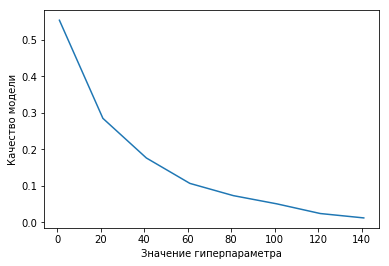

In [33]:
# График для kNN
print('График для kNN')
plot(ns, qualities_knn)

Какой гиперпараметр нам подходит лучше других? Если верить графику, чем больше это значение, тем хуже качество, следовательно, выбираем наименьший. В следующей ячейке выясним, какой из них наименьший.

In [34]:
# Данное значение гиперпараметра делает модель наиболее качественной
print(min(ns))

1


In [35]:
# kNN
# Настроим модель с использованием выбранного гиперпараметра
knn_itog = KNeighborsClassifier(n_neighbors=1)

In [36]:
quality = model_CV(model, X, y) # вот это почему-то не работает, хотя в функции указан return

Качество на обучении:  0.668166666667
Качество на валидации:  0.0125
Затраченное время: 0:00:21.288984


In [37]:
# lr
print('Logistic Regression')
qualities_lr = []
for c in cs:
    print('c:', c)
    lr = LogisticRegression(C=c, solver="lbfgs", random_state=12345)
    model = lr
    quality = model_CV(model, X, y) # вот это почему-то не работает, хотя в функции указан return
    qualities_lr.append(quality)
    print(qualities_lr)
    print('--')

Logistic Regression
c: 0.01
Качество на обучении:  0.628333333333
Качество на валидации:  0.0
Затраченное время: 0:00:10.445602
[0.0]
--
c: 0.517947467923
Качество на обучении:  0.583333333333
Качество на валидации:  0.056
Затраченное время: 0:00:11.334875
[0.0, 0.055999999999999994]
--
c: 26.8269579528
Качество на обучении:  0.634
Качество на валидации:  0.6205
Затраченное время: 0:00:12.662692
[0.0, 0.055999999999999994, 0.62049999999999994]
--
c: 1389.49549437
Качество на обучении:  0.668666666667
Качество на валидации:  0.6655
Затраченное время: 0:00:12.526074
[0.0, 0.055999999999999994, 0.62049999999999994, 0.66550000000000009]
--
c: 71968.5673001
Качество на обучении:  0.679666666667
Качество на валидации:  0.6785
Затраченное время: 0:00:11.783065
[0.0, 0.055999999999999994, 0.62049999999999994, 0.66550000000000009, 0.67849999999999999]
--
c: 3727593.72031
Качество на обучении:  0.642166666667
Качество на валидации:  0.7055
Затраченное время: 0:00:10.018162
[0.0, 0.05599999999999

График для логистической регрессии


<module 'matplotlib.pyplot' from '/Users/anastasiarodygina/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

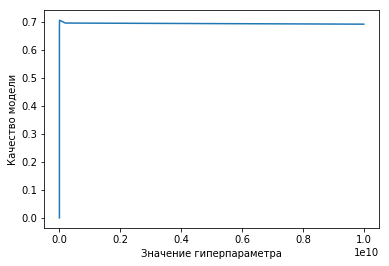

In [38]:
# График для логистической регрессии
print('График для логистической регрессии')
plot(cs, qualities_lr)

В ситуации с логистической регрессией график не позволяет подобрать лучший параметр так же легко, как в случае с кнн. Поэтому мы посмотрим на выведенные значения качества и выберем лучшее (см. ячейку ниже). 

In [39]:
# Лучшее значение качества
max(qualities_lr)

0.70550000000000002

Значение соответствующего гиперпараметра: 3727593.72031.

In [40]:
# lr
# Настроим модель с использованием выбранного гиперпараметра
lr_itog = LogisticRegression(C=3727593.72031)

In [41]:
# mnb
print('Multinomial NB')
qualities_mnb = []
for alpha in alphas:
    print('alpha:', alpha)
    mnb = MultinomialNB(alpha=alpha)
    model = mnb
    quality = model_CV(model, X, y)
    qualities_mnb.append(quality)
    print(qualities_mnb)
    print('--')

Multinomial NB
alpha: 0.0001
Качество на обучении:  0.999333333333
Качество на валидации:  0.3835
Затраченное время: 0:00:08.612350
[0.38349999999999995]
--
alpha: 0.000517947467923
Качество на обучении:  0.999166666667
Качество на валидации:  0.4325
Затраченное время: 0:00:08.743428
[0.38349999999999995, 0.4325]
--
alpha: 0.00268269579528
Качество на обучении:  0.997166666667
Качество на валидации:  0.4965
Затраченное время: 0:00:08.587554
[0.38349999999999995, 0.4325, 0.4965]
--
alpha: 0.0138949549437
Качество на обучении:  0.991333333333
Качество на валидации:  0.5545
Затраченное время: 0:00:08.617004
[0.38349999999999995, 0.4325, 0.4965, 0.55449999999999999]
--
alpha: 0.0719685673001
Качество на обучении:  0.831333333333
Качество на валидации:  0.3315
Затраченное время: 0:00:08.604692
[0.38349999999999995, 0.4325, 0.4965, 0.55449999999999999, 0.33150000000000002]
--
alpha: 0.372759372031
Качество на обучении:  0.666666666667
Качество на валидации:  0.0025
Затраченное время: 0:00:08

График для мультиномиального наивного байеса


<module 'matplotlib.pyplot' from '/Users/anastasiarodygina/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

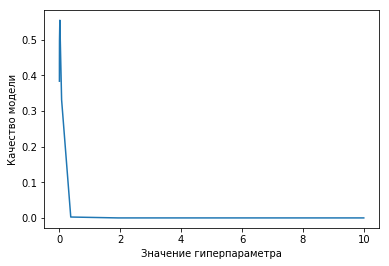

In [42]:
# График для мультиномиального наивного байеса
print('График для мультиномиального наивного байеса')
plot(alphas, qualities_mnb)

Данный график имеет ярковыраженный пик, в следующей ячейке будет выведено значение качества в нем.

In [43]:
max(qualities_mnb)

0.55449999999999999

Значение соответствующего гиперпараметра: 0.0138949549437.

In [44]:
# Настроим модель с использованием выбранного гиперпараметра
mnb_itog = MultinomialNB(alpha=0.0138949549437)

# Конец выполнения пунктов 1 и 2 в третьем задании. Фух.

Я понимаю, что все можно было сделать красивее и оформить в функцию код, который выводит значения качества на обучении и валидации, но не могу придумать, как передать параметры самой модели (n, C или alpha).
Небольшой крик души, но для такого трудоемкого и времязатратного домашнего задания могли бы дать побольше времени (вспомним домашки в прошлом семестре, это вообще ни разу не совместимо).
Так как у меня возникла только одна проблема с этой функцией, я размещу ее здесь.

#### def model_params(elem, elem_str, array, qualities, param_str, model_with_params(param_str=elem), model_str):
    ####print(model_str)
    ####for elem in array:
        print(elem_str, elem)   
        temp_model = model_with_params
        quality = model_CV(model, X, y)
        qualities.append(quality)
        print(qualities)
        print('--')
        
Очень много параметров, да, покажу на примере, как я ее собиралась запускать:

#qualities_knn = []
#knn = KNeighborsClassifier(n_neighbors=elem)
#model_params(n, 'n:', ns, qualities_knn, 'n_neighbors', knn, 'kNN')

elem фигурирует только в функции, поэтому я думала о том, что надо присвоить knn алгоритм без указания параметров и передать их как-то отдельно, но это как-то мутно, в голову не приходит, как реализовать. Будет круто, если кто-нибудь расскажет.

# Продублирую сюда оставшиеся пункты задания для удобства

1. ...
2. ...
3. 3 настроенные модели обучите на всем обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)
4. Повторите шаги 2-3 для n-gram=2
5. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)
6. Сделайте выводы по полученным результатам:
какой метод показал наилучшее качество на обучении? на валидации? на тестовой выборке? Если это разные классификаторы, подумайте, почему так происходит. Если один и тот же, в чем его преимущества перед остальными?
велика ли разница между качеством на обучении и на валидации? на валидации и контроле? Почему так происходит?
что означает n-gram=2? Улучшилось ли качество при переходе от n-gram=1 к n-gram=2? Предложите свои идеи, почему.
есть ли связь между качеством классификации и временем обучения/предсказания? какой классификатор обучается медленнее всего? медленнее всего делает предсказания? В чем причина?

In [45]:
# kNN
model_func(knn_itog, X_train_tfidf, y_train, X_test, y_test)

Доля правильных ответов: 0.486666666667
Затраченное время: 0:00:00.979344


In [46]:
# lr
model_func(lr_itog, X_train_tfidf, y_train, X_test, y_test)

Доля правильных ответов: 0.541666666667
Затраченное время: 0:00:00.401295


In [47]:
# mnb
model_func(mnb_itog, X_train_tfidf, y_train, X_test, y_test)

Доля правильных ответов: 0.788333333333
Затраченное время: 0:00:00.172391


Повторить шаги 2-3... Это жестоко... Было бы круто, конечно, написать функцию, которая включает в себя все, что было на шагах 1-3, но меняет 1 параметр, но ЭТО ЖЕ ВООБЩЕ НЕ ИЗИ! ТУТ КУЧА КОДА УЖЕ!!! (шла вторая ночь без сна, за окном рассвело и поют птицы)
### Окей! Держите еще кучу кода!
Очень жаль, что не получилось настроить функцию model_params, она бы сейчас облегчила жизнь.

## Увы, тут так ничего и не запустилось. Продолжение в другом ноутбуке. (HW2_Anastasia_Rodygina_part_2.ipynb)

In [ ]:
count = CountVectorizer(token_pattern=r"\b\w+\b", ngram_range=(2,2), max_features=20000 )
result = count.fit_transform(texts).toarray()
df = pd.DataFrame(data=result, columns=count.get_feature_names())

In [ ]:
# Заново разбили, чтобы не было конфликта имен (не совсем так, правильнее: чтобы быть уверенными,
# что мы обучаем то, что нужно)
X_train, X_test, y_train, y_test = train_test_split(result, vec, train_size=0.7, random_state=12345)

In [ ]:
# kNN
model_func(knn_itog, X_train, y_train, X_test, y_test)

In [ ]:
# lr
model_func(lr_itog, X_train, y_train, X_test, y_test)

In [ ]:
# mnb
model_func(mnb_itog, X_train, y_train, X_test, y_test)

### Черт... Я не настроила tfidf...
Кстати! Важное замечание! Еще в начале выполнения домашнего задания я случайно упустила tfidf и получилось, что работал только CountVectorizer. Качество моделей было достаточно хорошим. Когда я опомнилась и настроила tfidf, все резко испортилось и алгоритм приблизился к монетке. Сейчас скорее всего получится то же самое. Проверим.

In [ ]:
tfidf = TfidfVe(token_pattern=r'\b[a-z]+\b', ngram_range=(2, 2), lowercase=True, max_features=20000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

сори, мой ноут слишком слаб для того, чтобы посчитать с n-gram = 2

### 5 Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)

In [ ]:
Я жду уже больше 10 минут после перезапуска ноутбука после того, как он вылетел на этом же шаге. 

## Задача 4. (опционально)
#### Исследование влияния количества признаков FeatureHasher на качество классификации (+3 балла к сумме по всем ДЗ) 

<p>Изучите, что такое feature hashing (достаточно разобаться с документацией sklearn) и кратко опишите. Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [ ]:
n_features = np.logspace(1, 5, 5, base=10) # количество признаков
non_negative=True

<p>В этом задании можно воспользоваться GridSearchCV</p>

# Задача 5. (опционально)
__Простой прототип (+ 2 балла к сумме по всем ДЗ)__

Напишите функцию, которая берет на вход произвольную строку и возвращает для нее предсказание для вашей задачи. Придумайте по 3 примера строк для положительного и отрицательного класса, сделайте для них предсказание. Совпадают ли ваши метки и предсказания классификатора? Оцените (любым способом), насколько придуманные вами тексты похожи на объекты датасета, с которым вы работали.


In [ ]:
def predict_class_for_text(s):
    pass

In [ ]:
from sklearn.cross_validation import KFold
kf = KFold(10, n_folds=5)
for train, test in kf:
    print(train, test)